In [48]:

import colour_scheme as cs
import importlib
importlib.reload(cs)

import scanpy as sc
sc.settings.set_figure_params(dpi=100, fontsize=10, dpi_save=250, format='pdf')
import numpy as np
import pandas as pd
from scipy import io
from matplotlib.pyplot import rc_context
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
from pathlib import Path
%matplotlib inline
path_data = ''
path_fig = ''

In [42]:
osmgt = pd.read_csv(Path(path_data)/'enrichment_separate_lines.csv')
osmgt.head()

,Experiment,Control,Condition,Line,Cluster,oddsratio,pval,sample_size,Condition_ident_line,padj,score
0,SMG1,Control_SMG1,SHH_A,HES3,Pluripotent Stem Cells,10.098324,6.819144e-03,1110,SMG1_SHH_A_HES3,1.649989e-02,0.000000
1,SMG1,Control_SMG1,SHH_A,HES3,Neuroectoderm,3.121091,1.363829e-05,1110,SMG1_SHH_A_HES3,4.669863e-05,1.642050
2,SMG1,Control_SMG1,SHH_A,HES3,Neuroepithelium,15.294938,8.277921e-11,1110,SMG1_SHH_A_HES3,4.116177e-10,3.934982
3,SMG1,Control_SMG1,SHH_A,HES3,Telencephalic Progenitors,110.940058,3.496732e-149,1110,SMG1_SHH_A_HES3,6.317430e-147,5.000000
4,SMG1,Control_SMG1,SHH_A,HES3,Diencephalic Progenitors,0.000000,7.877200e-39,1110,SMG1_SHH_A_HES3,9.035857e-38,-5.000000


In [43]:
parse = pd.read_csv((Path(path_data)/'enrichment_parse.tsv', sep='\t')
parse.head()

,Experiment,Control,Condition,Line,Cluster,oddsratio,pval,padj,score
1,H1_SHH_A_NIM,H1_Ctrl_NIM,SHH_A_NIM,H1,CNS Neurons,0.317051,4.489768e-41,3.024837e-40,-1.657214
2,H1_SHH_A_NIM,H1_Ctrl_NIM,SHH_A_NIM,H1,Cortical Hem/Diencephalon,3.297575,3.530843e-01,5.234014e-01,0.000000
3,H1_SHH_A_NIM,H1_Ctrl_NIM,SHH_A_NIM,H1,Hindbrain Progenitors,1.098628,1.000000e+00,1.000000e+00,0.000000
4,H1_SHH_A_NIM,H1_Ctrl_NIM,SHH_A_NIM,H1,Hypothalamic Progenitors,inf,3.060934e-05,9.062089e-05,5.000000
5,H1_SHH_A_NIM,H1_Ctrl_NIM,SHH_A_NIM,H1,Neural Crest,0.000000,1.000000e+00,1.000000e+00,0.000000


In [44]:
harmonise_celltype ={'Diencephalic Progenitors':'Cortical Hem/Diencephalon',
                     'FOXA2+ Cells': 'Floor Plate'}

osmgt['Cluster'] = osmgt['Cluster'].replace(harmonise_celltype)

In [45]:
## merge

osmgt = osmgt[(osmgt['Line'].isin(['WTC', 'H9']))&(osmgt['Condition'].isin(['SHH_A', 'SHH_E', 'CHIR_A', 
                                                                'FGF8_late_A', 'FGF8_late_E', 'RA_A', 'RA_E']))].copy()

parse = parse[(parse['Line'].isin(['WTC', 'H9']))&(parse['Condition'].isin(['SHH_A_NIM', 'SHH_E_NIM', 'RA_A_NIM', 'RA_E_NIM', 'CHIR_A_NIM',
        'FGF8_late_A_NIM', 'FGF8_late_E_NIM']))]

parse['Condition'] = parse['Condition'].str[:-4]
parse


,Experiment,Control,Condition,Line,Cluster,oddsratio,pval,padj,score
12,H9_SHH_A_NIM,H9_Ctrl_NIM,SHH_A,H9,CNS Neurons,0.282648,4.962197e-09,1.862596e-08,-1.822921
13,H9_SHH_A_NIM,H9_Ctrl_NIM,SHH_A,H9,Cortical Hem/Diencephalon,4.207950,1.821323e-08,6.488848e-08,2.073118
14,H9_SHH_A_NIM,H9_Ctrl_NIM,SHH_A,H9,Floor Plate,inf,4.893617e-01,6.688155e-01,0.000000
15,H9_SHH_A_NIM,H9_Ctrl_NIM,SHH_A,H9,Hindbrain Progenitors,0.985385,1.000000e+00,1.000000e+00,0.000000
16,H9_SHH_A_NIM,H9_Ctrl_NIM,SHH_A,H9,Hypothalamic Progenitors,2.491945,3.232477e-02,6.767596e-02,0.000000
...,...,...,...,...,...,...,...,...,...
434,WTC_FGF8_late_E_NIM,WTC_Ctrl_NIM,FGF8_late_E,WTC,Non-neurectodermal tissues,13.803613,4.890427e-10,1.969287e-09,3.786974
435,WTC_FGF8_late_E_NIM,WTC_Ctrl_NIM,FGF8_late_E,WTC,PNS Neurons,9.729092,1.948072e-02,4.230215e-02,0.000000
436,WTC_FGF8_late_E_NIM,WTC_Ctrl_NIM,FGF8_late_E,WTC,Retinal Progenitors,3.406135,5.308896e-02,1.062790e-01,0.000000
437,WTC_FGF8_late_E_NIM,WTC_Ctrl_NIM,FGF8_late_E,WTC,Spinal Cord Progenitors,0.646809,1.000000e+00,1.000000e+00,0.000000


In [78]:
merged = pd.merge(osmgt[['Condition', 'Line', 'Cluster', 'score']], 
         parse[['Condition', 'Line', 'Cluster', 'score']], 
         on = ['Condition', 'Line', 'Cluster'], how = 'inner')
merged = merged.rename(columns={"score_x": "10x", "score_y": "parse"})


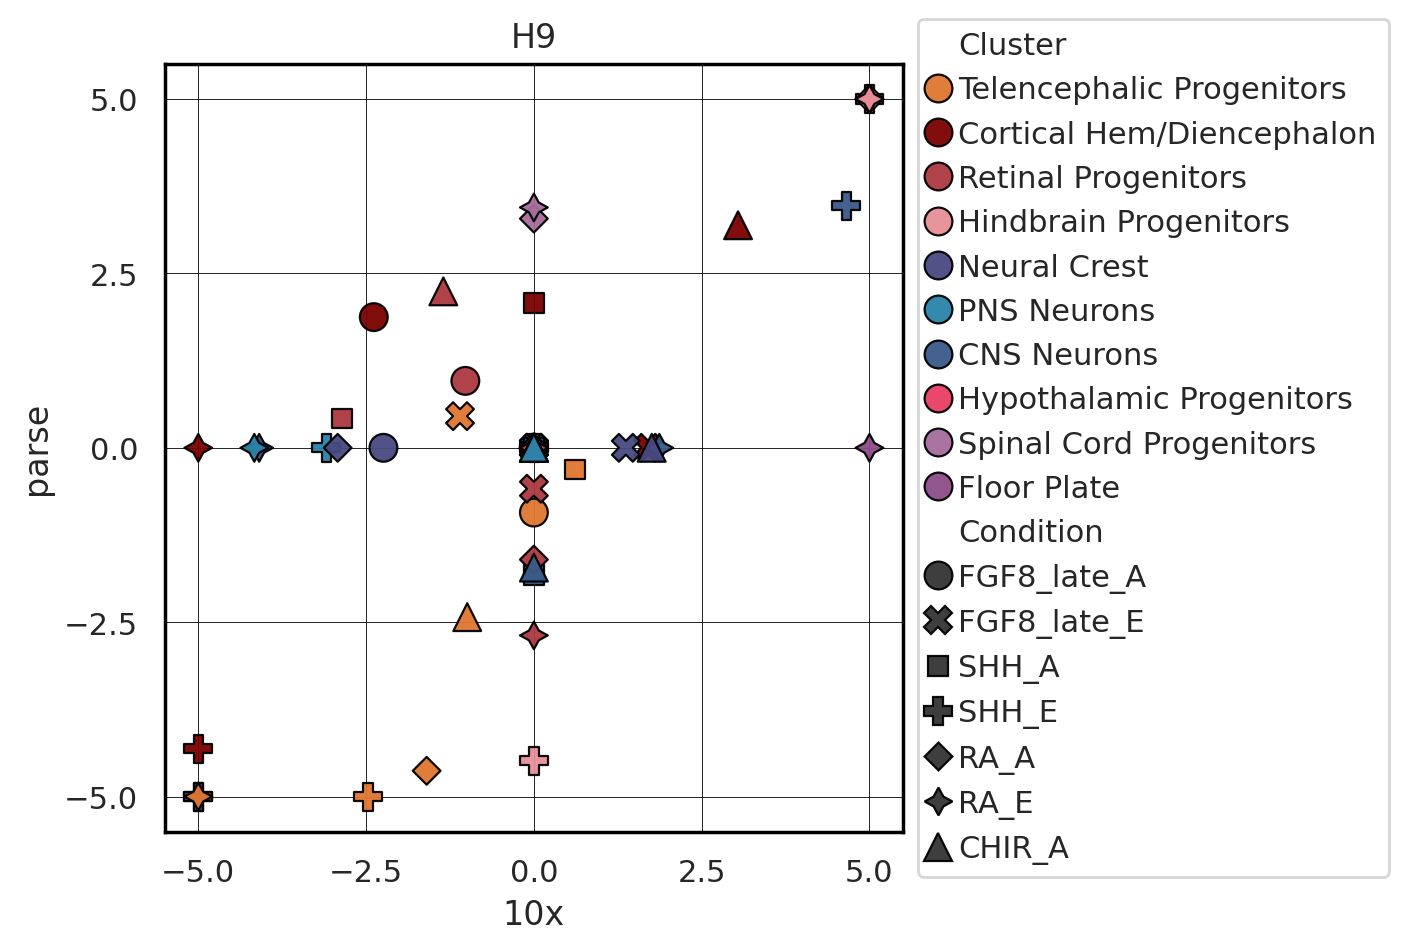

In [79]:

def plot_ap_dv(data, x, y, title = None, path_save=None):
    Morphogen_full = {"Ctrl":"#000000",
                  'SHH_A':"#FFDDAD",
                     'SHH_E':"#C66611",
                     'RA_A':"#E9F17E",
                     'RA_E':"#686F0C",
                     'CHIR_A':"#D8E9E9",
                     'CHIR_E':"#1B7472",
                     'FGF8_late_A':"#C7AED6",
                     'FGF8_late_E':"#8452A3"}
                    
    sns.set(rc={'figure.figsize':(7.2,5)})
    sns.set_style("whitegrid")
    plt.rcParams.update({
        "axes.edgecolor": "black",  # Make axes black
        "grid.color": "black",     # Make gridlines black
        "grid.linewidth": 0.3,     # Optional: Adjust gridline thickness
         #"axes.linewidth": 0.3,    
    })
    
    
    sns.scatterplot(
       data = data,
       x = x,
       y = y,
       hue='Cluster',
       palette = cs.cell_type_colors,
       s=100,
       alpha=0.95,
        style='Condition',
        #markers=['o', 's', '>', 'd'],
        edgecolor= 'black'
            #edgecolor=nim["edge_color"].values
    )

    plt.yticks([-5, -2.5, 0, 2.5, 5])  
    plt.xticks([-5, -2.5, 0, 2.5, 5])  

   
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(title)

    if path_save:
        plt.tight_layout()
        plt.rcParams['pdf.fonttype'] = 42 
        plt.savefig(path_save, dpi=300)

    plt.show()




### ED Fig. 9d ###
plot_ap_dv(merged[merged.Line=='H9'], "10x","parse","H9", path_fig+'H9.pdf')


In [83]:
from scipy import stats
res = stats.pearsonr(merged[merged.Line=='H9']['10x'],merged[merged.Line=='H9']['parse'])
res.statistic, res.pvalue

(0.6237695519736005, 6.095162939745767e-08)

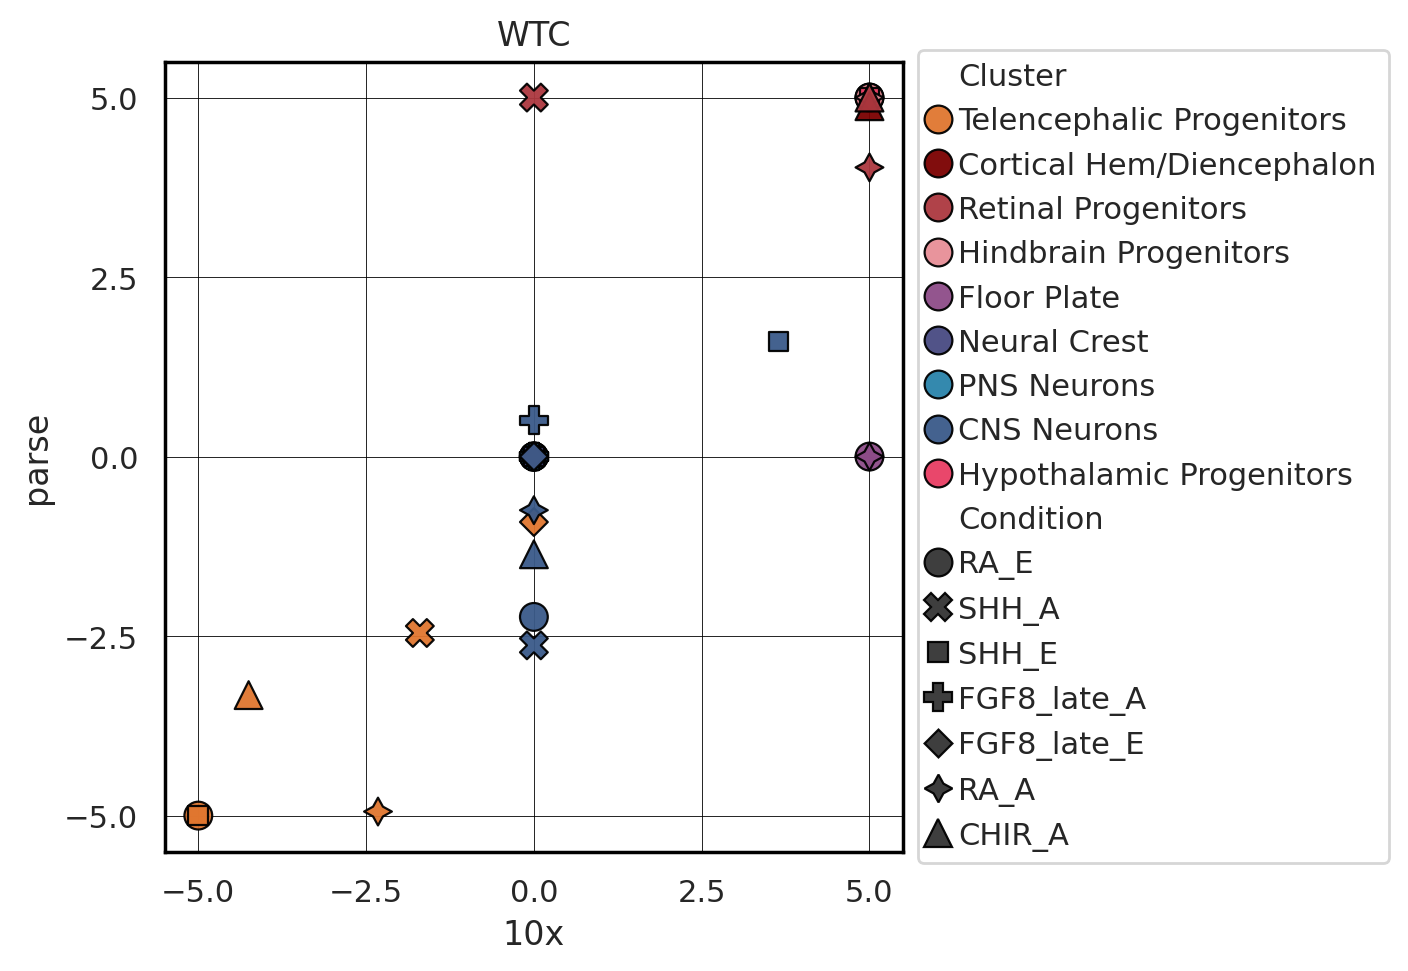

In [81]:
### ED Fig. 9d ###
plot_ap_dv(merged[merged.Line=='WTC'], "10x","parse","WTC", path_fig+'WTC.pdf')

In [84]:
res = stats.pearsonr(merged[merged.Line=='WTC']['10x'],merged[merged.Line=='WTC']['parse'])
res.statistic, res.pvalue

(0.8381056948541219, 6.237990607851458e-10)